In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [2]:
posts = pd.read_csv('/kaggle/input/alldatafilterd/AllDataFiltered.csv')
posts.head(5)

,combined_text,link_flair_text
0,"for everyone, whether you're worried about cov...",psa
1,and people wonder why the virus spreads…,rant
2,r/udub mods,meme
3,thoughts on madrona? i have an emotional suppo...,discussion
4,soc 222 anyone has took or taking soc222(socio...,academics


In [3]:
def clean_tokenize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

posts['tokens'] = posts['combined_text'].apply(clean_tokenize)

In [4]:
results = []

In [5]:
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=5000)

texts_bow = count_vectorizer.fit_transform(posts['tokens'])

X_train_bow, X_test_bow, y_train, y_test = train_test_split(texts_bow, posts['link_flair_text'], test_size=0.2, random_state=52)

bow_lr = LogisticRegression(max_iter=1000)
bow_lr.fit(X_train_bow, y_train)

y_pred_bow = bow_lr.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)

results.append({'vectorizationType': 'Bag of Words (BoW)', 'Model': 'LogisticRegression', 'Accuracy': accuracy_bow * 100})

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [6]:
bow_svc = SVC()
bow_svc.fit(X_train_bow, y_train)

y_pred_bow = bow_svc.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)

results.append({'vectorizationType': 'Bag of Words (BoW)', 'Model': 'SVC', 'Accuracy': accuracy_bow * 100})

In [7]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=5000)

texts_tfidf = tfidf_vectorizer.fit_transform(posts['tokens'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(texts_tfidf, posts['link_flair_text'], test_size=0.2, random_state=52)

tfidf_lr = LogisticRegression(max_iter=1000)
tfidf_lr.fit(X_train_tfidf, y_train)

y_pred_tfidf = tfidf_lr.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

results.append({'vectorizationType': 'TF-IDF', 'Model': 'LogisticRegression', 'Accuracy': accuracy_tfidf * 100})

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
tfidf_svc = SVC()
tfidf_svc.fit(X_train_tfidf, y_train)

y_pred_tfidf = tfidf_svc.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

results.append({'vectorizationType': 'TF-IDF', 'Model': 'SVC', 'Accuracy': accuracy_tfidf * 100})

In [9]:
docs = posts["combined_text"].values
tokenized_docs = posts["tokens"].values
model = Word2Vec(sentences=tokenized_docs, window = 2, vector_size=200, workers=1, seed=52)
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=model)

X_train, X_test, y_train, y_test = train_test_split(vectorized_docs, posts['link_flair_text'], test_size=0.2, random_state=52)
clf_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB()),
])
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

accuracy_word2vec = accuracy_score(y_test, y_pred)

results.append({'vectorizationType': 'Word2Vec', 'Model': 'LogisticRegression', 'Accuracy': accuracy_word2vec * 100})

In [10]:
clf_svc = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB()),
])
clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)

accuracy_word2vec = accuracy_score(y_test, y_pred)

results.append({'vectorizationType': 'Word2Vec', 'Model': 'SVC', 'Accuracy': accuracy_word2vec * 100})

In [11]:
print(pd.DataFrame(results))

    vectorizationType               Model   Accuracy
0  Bag of Words (BoW)  LogisticRegression  51.157298
1  Bag of Words (BoW)                 SVC  51.771375
2              TF-IDF  LogisticRegression  53.566368
3              TF-IDF                 SVC  54.511101
4            Word2Vec  LogisticRegression  40.670761
5            Word2Vec                 SVC  40.670761


In [20]:
# Your existing code modified:
max_features_options = [1000, 3000, 5000]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]  # Unigrams, bigrams, and trigrams

tf_results = []

for max_features in max_features_options:
    for ngram_range in ngram_ranges:
        vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=max_features, ngram_range=ngram_range)
        X = vectorizer.fit_transform(posts['tokens'])  # Assuming posts['tokens'] exists
        y = posts['link_flair_text']  # Assuming posts['link_flair_text'] exists
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        lr_model = LogisticRegression(max_iter=1000)
        lr_model.fit(X_train, y_train)
        lr_predictions = lr_model.predict(X_test)
        lr_accuracy = accuracy_score(y_test, lr_predictions)

        svc_model = SVC()
        svc_model.fit(X_train, y_train)
        svc_predictions = svc_model.predict(X_test)
        svc_accuracy = accuracy_score(y_test, svc_predictions)

        tf_results.append({
            'Max Features': max_features,
            'Ngram Range': f"{ngram_range[0]}-{ngram_range[1]}",
            'LR Accuracy': lr_accuracy,
            'SVC Accuracy': svc_accuracy
        })

tf_results_df = pd.DataFrame(tf_results)

# Create a new column for easier plotting
tf_results_df['Config'] = tf_results_df['Max Features'].astype(str) + ' | ' + tf_results_df['Ngram Range']

print(tf_results_df)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


KeyboardInterrupt: 

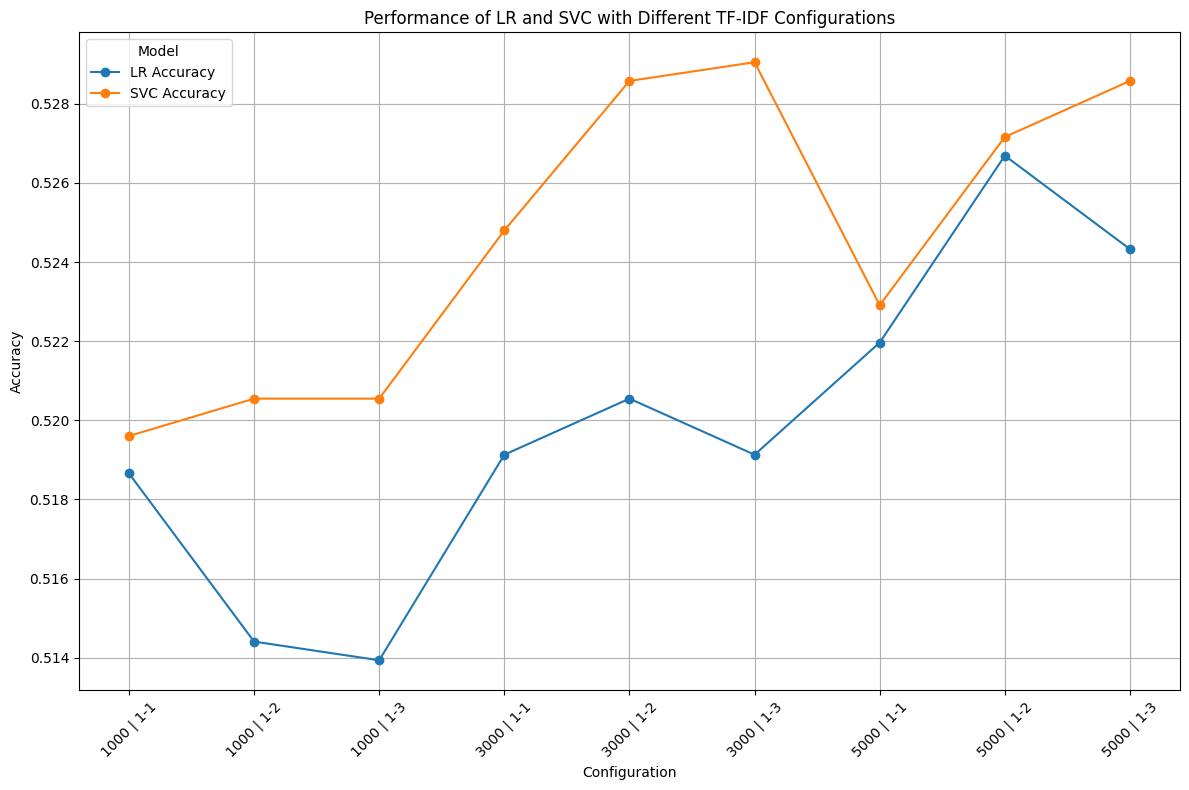

In [21]:
# Visualization with a line plot
fig, ax = plt.subplots(figsize=(12, 8))
tf_results_df.plot(kind='line', x='Config', y=['LR Accuracy', 'SVC Accuracy'], marker='o', ax=ax)
ax.set_title('Performance of LR and SVC with Different TF-IDF Configurations')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Configuration')
plt.xticks(ticks=range(len(tf_results_df['Config'])), labels=tf_results_df['Config'], rotation=45)
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extr

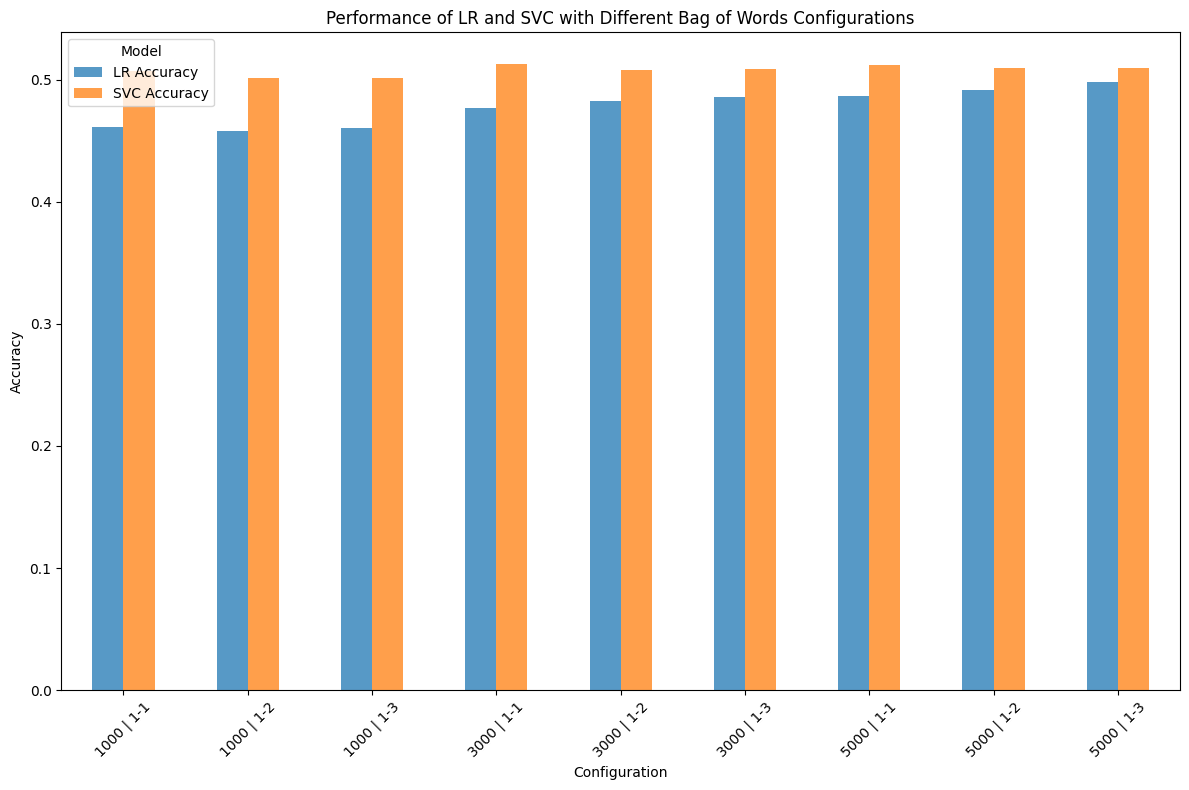

In [13]:
# Define the parameter grid
max_features_options = [1000, 3000, 5000]
ngram_ranges = [(1, 1), (1, 2), (1, 3)]  # Unigrams, bigrams, and trigrams

# Store results
bow_results = []

# Iterate over each combination of parameters
for max_features in max_features_options:
    for ngram_range in ngram_ranges:
        vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=max_features, ngram_range=ngram_range)
        X = vectorizer.fit_transform(posts['tokens'])
        y = posts['link_flair_text']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Logistic Regression
        lr_model = LogisticRegression(max_iter=1000)
        lr_model.fit(X_train, y_train)
        lr_predictions = lr_model.predict(X_test)
        lr_accuracy = accuracy_score(y_test, lr_predictions)

        # Train SVM
        svc_model = SVC()
        svc_model.fit(X_train, y_train)
        svc_predictions = svc_model.predict(X_test)
        svc_accuracy = accuracy_score(y_test, svc_predictions)

        # Append results
        bow_results.append({
            'Max Features': max_features,
            'Ngram Range': ngram_range,
            'LR Accuracy': lr_accuracy,
            'SVC Accuracy': svc_accuracy
        })

# Convert results to DataFrame
bow_results_df = pd.DataFrame(bow_results)

# Create a new column for easier plotting
bow_results_df['Config'] = bow_results_df['Max Features'].astype(str) + ' | ' + bow_results_df['Ngram Range'].apply(lambda x: f"{x[0]}-{x[1]}")

print(bow_results_df)

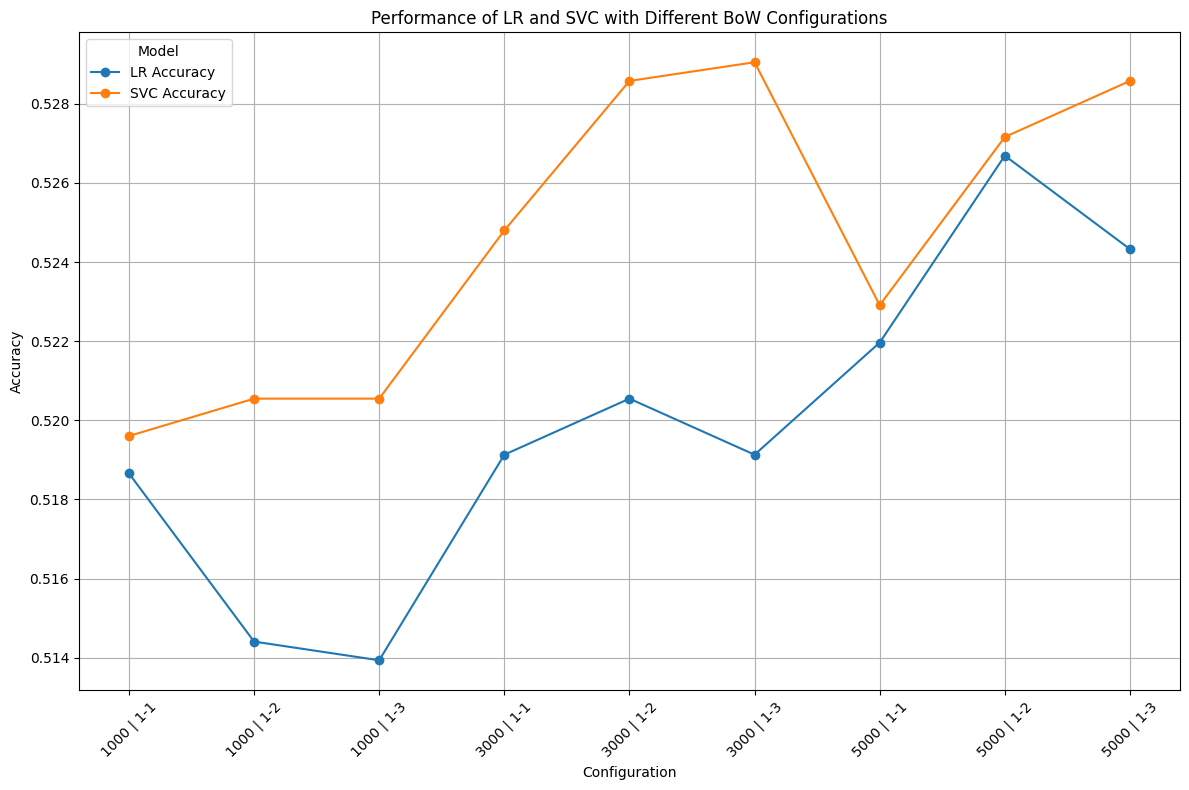

In [23]:
# Visualization with a line plot
fig, ax = plt.subplots(figsize=(12, 8))
bow_results_df.plot(kind='line', x='Config', y=['LR Accuracy', 'SVC Accuracy'], marker='o', ax=ax)
ax.set_title('Performance of LR and SVC with Different BoW Configurations')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Configuration')
plt.xticks(ticks=range(len(bow_results_df['Config'])), labels=bow_results_df['Config'], rotation=45)
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

    Window Size  Vector Size  Min Count                Model   Accuracy
0             2          100          1  Logistic Regression  47.283892
1             2          100          1                  SVC  48.937175
2             2          100          2  Logistic Regression  47.142182
3             2          100          2                  SVC  49.362305
4             2          100          5  Logistic Regression  46.811526
5             2          100          5                  SVC  49.740198
6             2          200          1  Logistic Regression  47.047709
7             2          200          1                  SVC  48.512045
8             2          200          2  Logistic Regression  47.189419
9             2          200          2                  SVC  48.323099
10            2          200          5  Logistic Regression  47.661786
11            2          200          5                  SVC  48.370335
12            2          300          1  Logistic Regression  46

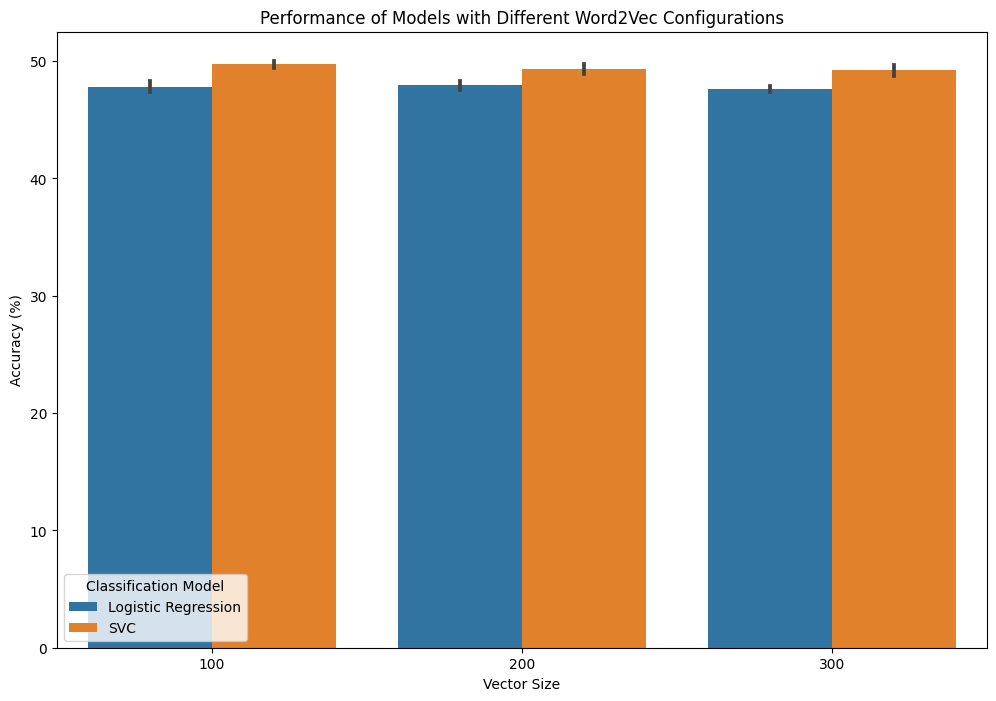

In [14]:
# Define the parameter grid
window_sizes = [2, 5, 10]
vector_sizes = [100, 200, 300]
min_counts = [1, 2, 5]

# Store results
w2v_results = []

# Function to generate vectors from a Word2Vec model
def vectorize(tokens_list, model):
    features = []
    for tokens in tokens_list:
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            vectors = np.array(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(np.zeros(model.vector_size))
    return np.array(features)

# Iterate over each combination of parameters
for window in window_sizes:
    for size in vector_sizes:
        for min_count in min_counts:
            model = Word2Vec(sentences=posts['tokens'], window=window, vector_size=size, min_count=min_count, workers=4, seed=42)
            vectors = vectorize(posts['tokens'], model)
            
            X_train, X_test, y_train, y_test = train_test_split(vectors, posts['link_flair_text'], test_size=0.2, random_state=42)

            # Logistic Regression
            lr_pipeline = Pipeline([
                ('scaler', MinMaxScaler()),
                ('lr', LogisticRegression(max_iter=1000))
            ])
            lr_pipeline.fit(X_train, y_train)
            lr_pred = lr_pipeline.predict(X_test)
            lr_accuracy = accuracy_score(y_test, lr_pred)

            # SVM
            svc_pipeline = Pipeline([
                ('scaler', MinMaxScaler()),
                ('svc', SVC())
            ])
            svc_pipeline.fit(X_train, y_train)
            svc_pred = svc_pipeline.predict(X_test)
            svc_accuracy = accuracy_score(y_test, svc_pred)

            # Store results
            w2v_results.append({
                'Window Size': window,
                'Vector Size': size,
                'Min Count': min_count,
                'Model': 'Logistic Regression',
                'Accuracy': lr_accuracy * 100
            })
            w2v_results.append({
                'Window Size': window,
                'Vector Size': size,
                'Min Count': min_count,
                'Model': 'SVC',
                'Accuracy': svc_accuracy * 100
            })

# Convert results to DataFrame and display
w2v_results_df = pd.DataFrame(w2v_results)
print(w2v_results_df)

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=w2v_results_df, x='Vector Size', y='Accuracy', hue='Model')
ax.set_title('Performance of Models with Different Word2Vec Configurations')
ax.set_xlabel('Vector Size')
ax.set_ylabel('Accuracy (%)')
plt.legend(title='Classification Model')
plt.show()

In [25]:
import optuna
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to tune via Optuna
    ngram_range = trial.suggest_categorical('ngram_range', [(1, 1), (1, 2), (1, 3)])
    max_features = trial.suggest_int('max_features', 500, 10000, step=500)
    classifier_type = trial.suggest_categorical('classifier_type', ['LogisticRegression', 'SVC'])
    
    # Set up the vectorizer
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=max_features, ngram_range=ngram_range)
    X = vectorizer.fit_transform(posts['tokens'])
    y = posts['link_flair_text']
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Set up the classifier
    if classifier_type == 'LogisticRegression':
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        model = LogisticRegression(max_iter=1000, C=C)
    else:
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        gamma = trial.suggest_loguniform('gamma', 1e-3, 1e3)
        model = SVC(C=C, gamma=gamma)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return 1 - accuracy  # Optuna tries to minimize the objective

# Create a study object
study = optuna.create_study()
study.optimize(objective, n_trials=50)  # You can increase n_trials for a more thorough search

print("Best parameters: ", study.best_params)
print("Best cross-validation accuracy: ", 1 - study.best_value)

[I 2024-05-08 00:20:34,463] A new study created in memory with name: no-name-7eae3006-46fb-4358-9409-a91ab06c25d1
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 3) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning

Best parameters:  {'ngram_range': (1, 2), 'max_features': 4000, 'classifier_type': 'LogisticRegression', 'C': 0.023094958480987273}
Best cross-validation accuracy:  0.5172413793103449


In [1]:
tf_results = []

for i in range(500, 10001, 500):
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, max_features=i)
    X = vectorizer.fit_transform(posts['tokens'])  # Assuming posts['tokens'] exists
    y = posts['link_flair_text']  # Assuming posts['link_flair_text'] exists

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)

    tf_results.append({
        'Max Features': i,
        'LR Accuracy': lr_accuracy,
    })

tf_results_df = pd.DataFrame(tf_results)

# Create a new column for easier plotting
tf_results_df['Config'] = tf_results_df['Max Features'].astype(str)

print(tf_results_df)

NameError: name 'TfidfVectorizer' is not defined

In [ ]:
    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    svc_predictions = svc_model.predict(X_test)
    svc_accuracy = accuracy_score(y_test, svc_predictions)
    'SVC Accuracy': svc_accuracy
